# Nossos dados

## Importação das Bibliotecas

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Bibliotecas de Treinamento de dados
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats

## Importação do Dataset e Checagem dos dados

In [265]:
datasetEconomicFreedom = pd.read_csv('efw_cc.csv')
datasetEconomicFreedom.shape

(3726, 36)

In [266]:
datasetEconomicFreedom.head()

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069


In [267]:
datasetEconomicFreedom.columns

Index(['year', 'ISO_code', 'countries', 'ECONOMIC FREEDOM', 'rank', 'quartile',
       '1a_government_consumption', '1b_transfers', '1c_gov_enterprises',
       '1d_top_marg_tax_rate', '1_size_government', '2a_judicial_independence',
       '2b_impartial_courts', '2c_protection_property_rights',
       '2d_military_interference', '2e_integrity_legal_system',
       '2f_legal_enforcement_contracts', '2g_restrictions_sale_real_property',
       '2h_reliability_police', '2i_business_costs_crime',
       '2j_gender_adjustment', '2_property_rights', '3a_money_growth',
       '3b_std_inflation', '3c_inflation', '3d_freedom_own_foreign_currency',
       '3_sound_money', '4a_tariffs', '4b_regulatory_trade_barriers',
       '4c_black_market', '4d_control_movement_capital_ppl', '4_trade',
       '5a_credit_market_reg', '5b_labor_market_reg', '5c_business_reg',
       '5_regulation'],
      dtype='object')

## Filtragem dos Dados e Tradução

In [268]:
colunasDeInteresse1 = datasetEconomicFreedom[['year', 'countries','ECONOMIC FREEDOM', 'rank', '1d_top_marg_tax_rate', '3a_money_growth']]
colunasDeInteresse1.columns = ['Ano', 'Paises', 'Liberdade Economica', 'Rank', 'Aliquota Maxima de Imposto', 'Crescimento da Moeda']

# Dataset dadosSomente2016

In [269]:
# Craindo um dataset com todas as informações de 2016
dadosSomenteDe2016 = colunasDeInteresse1.query('Ano == 2016')


## Agrupamento dos Dados

In [270]:
dados_2016_Organizados_Por_Ranking = dadosSomenteDe2016.sort_values('Rank')

In [271]:
dados_2016_Organizados_Por_Ranking

,Ano,Paises,Liberdade Economica,Rank,Aliquota Maxima de Imposto,Crescimento da Moeda
63,2016,Hong Kong,8.97,1.0,10.0,9.145594
130,2016,Singapore,8.84,2.0,10.0,9.711728
107,2016,New Zealand,8.49,3.0,7.0,8.832740
140,2016,Switzerland,8.39,4.0,7.0,9.921561
70,2016,Ireland,8.07,5.0,4.5,7.825452
...,...,...,...,...,...,...
35,2016,"Congo, Rep. Of",5.02,157.0,4.0,7.762545
1,2016,Algeria,4.99,159.0,4.5,6.955962
3,2016,Argentina,4.84,160.0,4.0,5.233264
86,2016,Libya,4.74,161.0,9.5,7.001157


In [272]:
dados_2016_Organizados_Por_Ranking


,Ano,Paises,Liberdade Economica,Rank,Aliquota Maxima de Imposto,Crescimento da Moeda
63,2016,Hong Kong,8.97,1.0,10.0,9.145594
130,2016,Singapore,8.84,2.0,10.0,9.711728
107,2016,New Zealand,8.49,3.0,7.0,8.832740
140,2016,Switzerland,8.39,4.0,7.0,9.921561
70,2016,Ireland,8.07,5.0,4.5,7.825452
...,...,...,...,...,...,...
35,2016,"Congo, Rep. Of",5.02,157.0,4.0,7.762545
1,2016,Algeria,4.99,159.0,4.5,6.955962
3,2016,Argentina,4.84,160.0,4.0,5.233264
86,2016,Libya,4.74,161.0,9.5,7.001157


## Plot: Grafico de Barra comparando a Aliquota Maxima de Imposto dos top 10 paises no ranking de Liberdade Economica

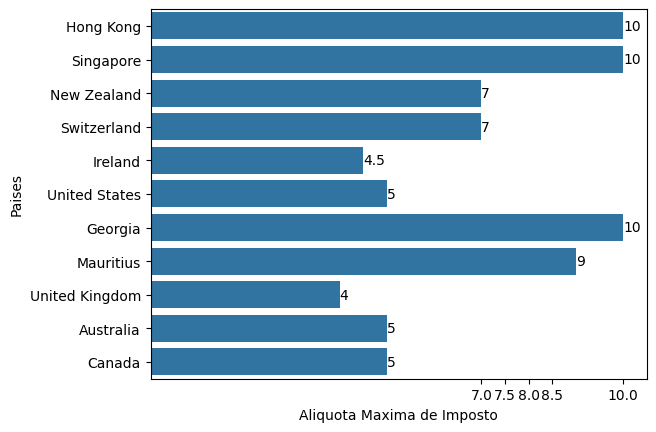

In [273]:
barplotLiberdadeEconomica_Por_RankDePais_10_Melhores = sns.barplot(x='Aliquota Maxima de Imposto', y = 'Paises' , data=dados_2016_Organizados_Por_Ranking.query('1.0 <= Rank <= 10.0 '))
barplotLiberdadeEconomica_Por_RankDePais_10_Melhores.bar_label(barplotLiberdadeEconomica_Por_RankDePais_10_Melhores.containers[0], fontsize=10)



plt.xticks([7, 7.5, 8, 8.5,10])

plt.show()


## Plot: Grafico de Linha, mostrando uma comparação da Aliquota Maxima de Imposto, Liberdade Economica e Crescimento da Moeda, dos top 10 paises no ranking de Liberdade Economica

In [274]:
LiberdadeEconomica_Por_RankDePais_10_Melhores = dados_2016_Organizados_Por_Ranking.query('1.0 <= Rank <= 10.0 ')

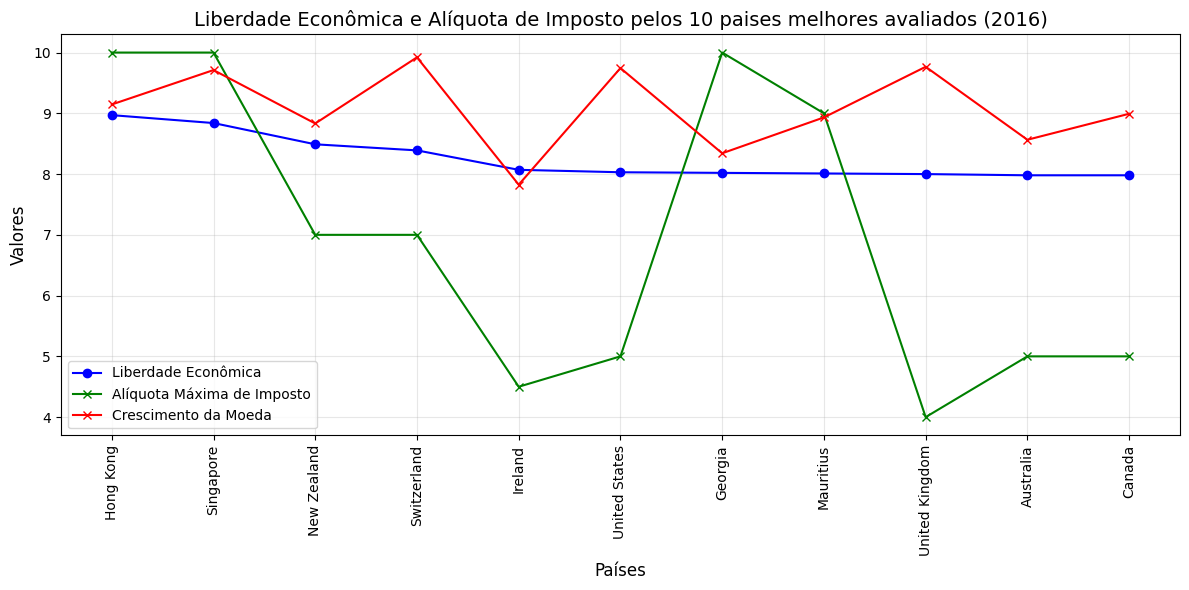

In [275]:
plt.figure(figsize=(12, 6))
plt.plot(LiberdadeEconomica_Por_RankDePais_10_Melhores['Paises'], LiberdadeEconomica_Por_RankDePais_10_Melhores['Liberdade Economica'], marker='o', color='blue', label='Liberdade Econômica')
plt.plot(LiberdadeEconomica_Por_RankDePais_10_Melhores['Paises'], LiberdadeEconomica_Por_RankDePais_10_Melhores['Aliquota Maxima de Imposto'], marker='x', color='green', label='Alíquota Máxima de Imposto')
plt.plot(LiberdadeEconomica_Por_RankDePais_10_Melhores['Paises'], LiberdadeEconomica_Por_RankDePais_10_Melhores['Crescimento da Moeda'], marker='x', color='red', label='Crescimento da Moeda')



plt.title('Liberdade Econômica e Alíquota de Imposto pelos 10 paises melhores avaliados (2016)', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Plot: Grafico de Barra comparando a Aliquota Maxima de Imposto dos top 10 piores paises no ranking de Liberdade Economica

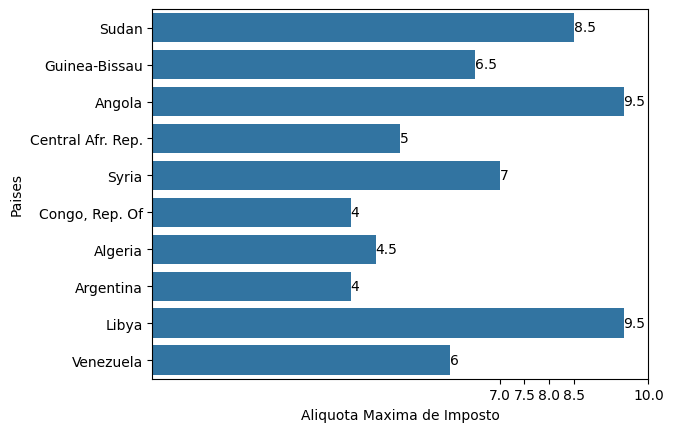

In [276]:
barplotLiberdadeEconomica_Por_RankDePais_10_piores = sns.barplot(x='Aliquota Maxima de Imposto', y = 'Paises' , data=dados_2016_Organizados_Por_Ranking.query('Rank > 152.0'))
barplotLiberdadeEconomica_Por_RankDePais_10_piores.bar_label(barplotLiberdadeEconomica_Por_RankDePais_10_piores.containers[0], fontsize=10)



plt.xticks([7, 7.5, 8, 8.5,10])

plt.show()

## Plot: Grafico de Linha, mostrando uma comparação da Aliquota Maxima de Imposto, Liberdade Economica e Crescimento da Moeda, dos top 10 PIORES paises no ranking de Liberdade Economica

In [277]:
LiberdadeEconomica_Por_RankDePais_10_Piores = dados_2016_Organizados_Por_Ranking.query('Rank > 152.0')

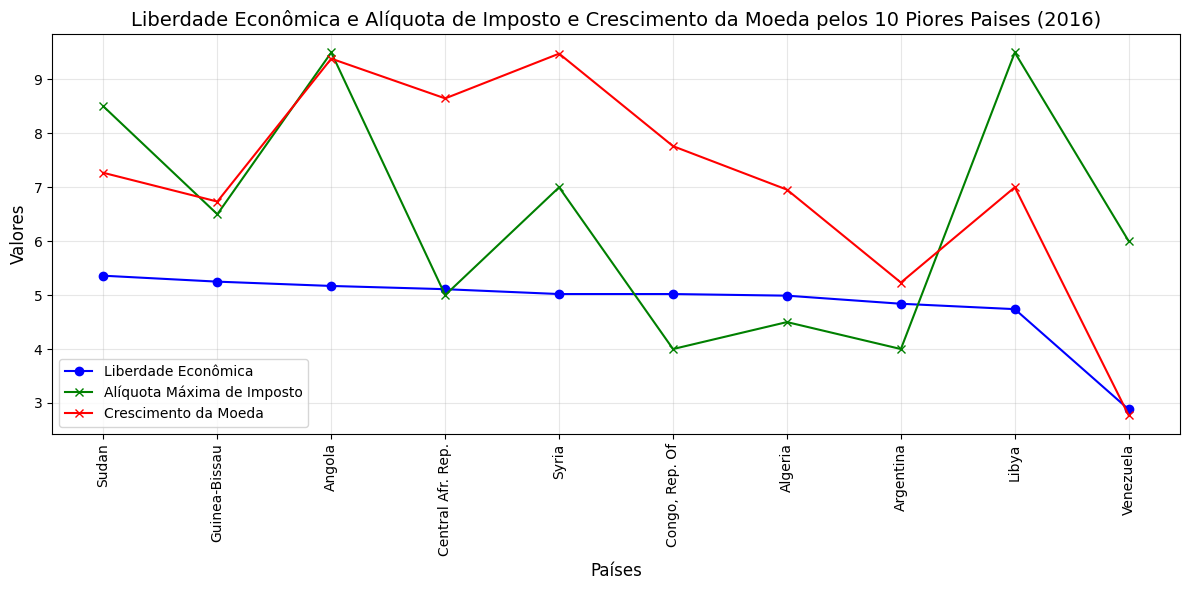

In [278]:
plt.figure(figsize=(12, 6))
plt.plot(LiberdadeEconomica_Por_RankDePais_10_Piores['Paises'], LiberdadeEconomica_Por_RankDePais_10_Piores['Liberdade Economica'], marker='o', color='blue', label='Liberdade Econômica')
plt.plot(LiberdadeEconomica_Por_RankDePais_10_Piores['Paises'], LiberdadeEconomica_Por_RankDePais_10_Piores['Aliquota Maxima de Imposto'], marker='x', color='green', label='Alíquota Máxima de Imposto')
plt.plot(LiberdadeEconomica_Por_RankDePais_10_Piores['Paises'], LiberdadeEconomica_Por_RankDePais_10_Piores['Crescimento da Moeda'], marker='x', color='red', label='Crescimento da Moeda')



plt.title('Liberdade Econômica e Alíquota de Imposto e Crescimento da Moeda pelos 10 Piores Paises (2016)', fontsize=14)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Dataset 3PaisesMaisRicos de 2010 a 2016

In [279]:
# Isolando todos os registros de Hong Kong, Singapura e Nova Zelandia (10 melhores paises de 2016)
HKDados2010a2016 = colunasDeInteresse1.query('Paises == "Hong Kong" and Ano >= 2010 and Ano <= 2016')
SING2010a2016 = colunasDeInteresse1.query('Paises == "Singapore" and Ano >= 2010 and Ano <= 2016')
NZ2010a2016 = colunasDeInteresse1.query('Paises == "New Zealand" and Ano >= 2010 and Ano <= 2016')


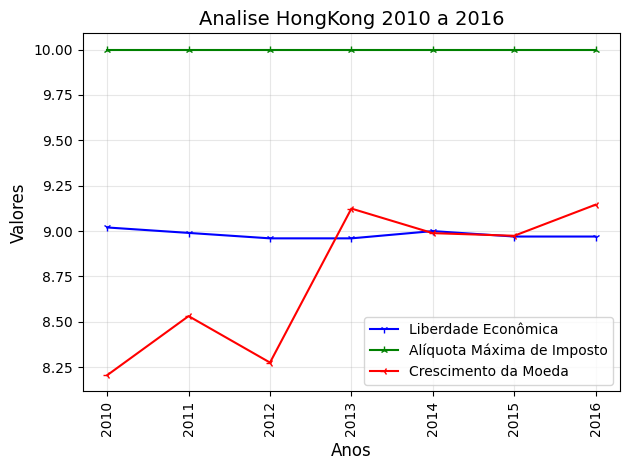

In [280]:
# HongKong Analise HongKong 2010 a 2016

plt.plot(HKDados2010a2016['Ano'],HKDados2010a2016['Liberdade Economica'], marker='1', color='blue', label='Liberdade Econômica')
plt.plot(HKDados2010a2016['Ano'],HKDados2010a2016['Aliquota Maxima de Imposto'], marker='2', color='green', label='Alíquota Máxima de Imposto')
plt.plot(HKDados2010a2016['Ano'],HKDados2010a2016['Crescimento da Moeda'], marker='3', color='red', label='Crescimento da Moeda')


plt.title('Analise HongKong 2010 a 2016', fontsize=14)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

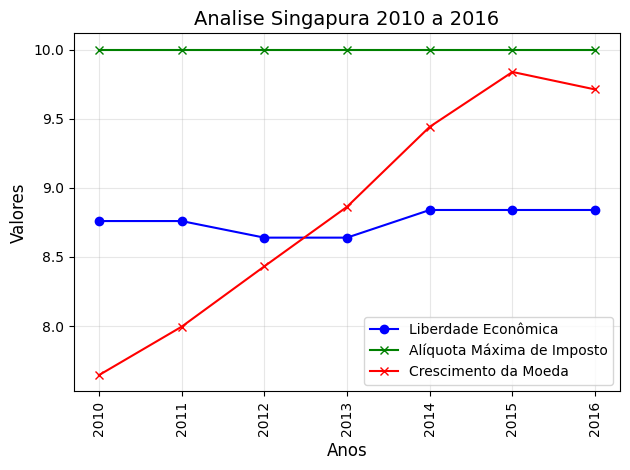

In [281]:
# Singapore Analise HongKong 2010 a 2016
plt.plot(SING2010a2016['Ano'],SING2010a2016['Liberdade Economica'], marker='o', color='blue', label='Liberdade Econômica')
plt.plot(SING2010a2016['Ano'],SING2010a2016['Aliquota Maxima de Imposto'], marker='x', color='green', label='Alíquota Máxima de Imposto')
plt.plot(SING2010a2016['Ano'],SING2010a2016['Crescimento da Moeda'], marker='x', color='red', label='Crescimento da Moeda')


plt.title('Analise Singapura 2010 a 2016', fontsize=14)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

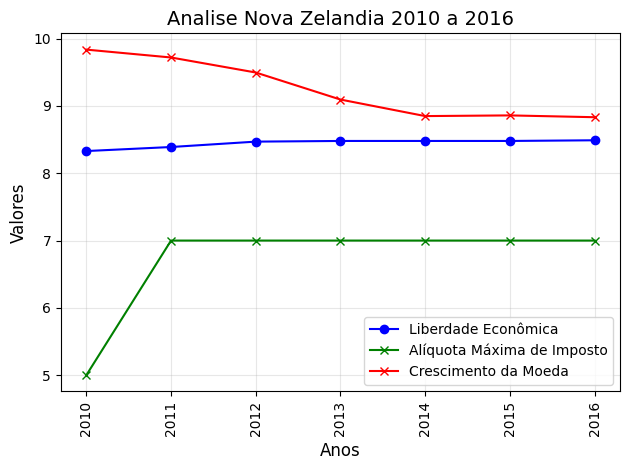

In [282]:
# New Zeland Analise HongKong 2010 a 2016
plt.plot(NZ2010a2016['Ano'],NZ2010a2016['Liberdade Economica'], marker='o', color='blue', label='Liberdade Econômica')
plt.plot(NZ2010a2016['Ano'],NZ2010a2016['Aliquota Maxima de Imposto'], marker='x', color='green', label='Alíquota Máxima de Imposto')
plt.plot(NZ2010a2016['Ano'],NZ2010a2016['Crescimento da Moeda'], marker='x', color='red', label='Crescimento da Moeda')

plt.title('Analise Nova Zelandia 2010 a 2016', fontsize=14)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Regreção Linear

In [283]:
NovaZelandiaTodosOsRegistros = colunasDeInteresse1.query('Paises == "New Zealand" and Ano > 1970')
NovaZelandiaTodosOsRegistros.sort_values('Ano', ascending=False)

,Ano,Paises,Liberdade Economica,Rank,Aliquota Maxima de Imposto,Crescimento da Moeda
107,2016,New Zealand,8.49,3.0,7.0,8.832740
269,2015,New Zealand,8.48,3.0,7.0,8.859669
431,2014,New Zealand,8.48,3.0,7.0,8.849475
593,2013,New Zealand,8.48,3.0,7.0,9.095206
755,2012,New Zealand,8.47,3.0,7.0,9.496865
917,2011,New Zealand,8.39,3.0,7.0,9.720061
1079,2010,New Zealand,8.33,3.0,5.0,9.837044
1241,2009,New Zealand,8.27,3.0,5.0,9.758484
1403,2008,New Zealand,8.40,3.0,5.0,9.725666
1565,2007,New Zealand,8.39,4.0,5.0,9.781001


In [284]:
NovaZelandiaTodosOsRegistros.isna().sum()

Ano                           0
Paises                        0
Liberdade Economica           0
Rank                          0
Aliquota Maxima de Imposto    0
Crescimento da Moeda          0
dtype: int64

In [285]:
novazelandiaSemNA = NovaZelandiaTodosOsRegistros.dropna(axis=1)


## Regressão linear com os dados de todos os registros da Nova Zelandia de 1975 a 2016, traçando uma previsão do Crescimento da Moeda atrelado a Aliquota Maxima de Imposto

In [286]:
#Variáveis independentes (X) e dependentes (y)
X = novazelandiaSemNA['Crescimento da Moeda']# Crescimento da Moeda
y = novazelandiaSemNA['Aliquota Maxima de Imposto']# Alíquota Máxima de Imposto  
#Adicionar uma constante ao modelo
X_const = sm.add_constant(X)

#Ajustar o modelo de regressão
model = sm.OLS(y, X_const).fit()

#Exibir o resumo do modelo
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     Aliquota Maxima de Imposto   R-squared:                       0.002
Model:                                    OLS   Adj. R-squared:                 -0.048
Method:                         Least Squares   F-statistic:                   0.04728
Date:                        Thu, 28 Nov 2024   Prob (F-statistic):              0.830
Time:                                21:47:18   Log-Likelihood:                -43.662
No. Observations:                          22   AIC:                             91.32
Df Residuals:                              20   BIC:                             93.51
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

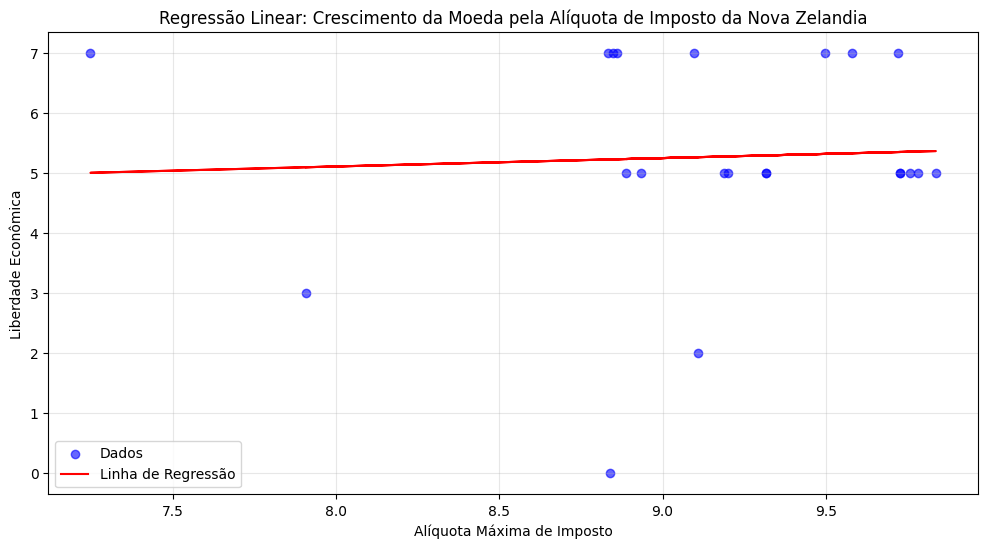

In [287]:
#Plotar a linha de regressão
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Dados')
plt.plot(X, model.predict(X_const), color='red', label='Linha de Regressão')
plt.title('Regressão Linear: Crescimento da Moeda pela Alíquota de Imposto da Nova Zelandia')
plt.xlabel('Alíquota Máxima de Imposto')
plt.ylabel('Liberdade Econômica')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Intervalo de Confiança

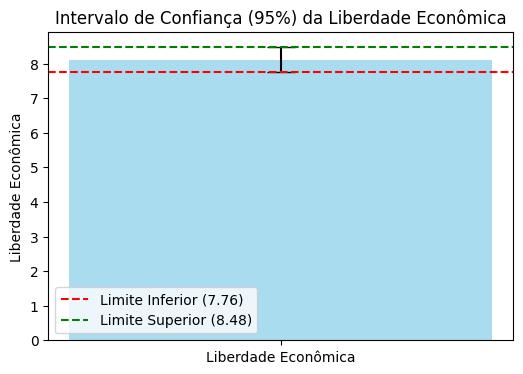

In [288]:
#Calcular a média e o desvio padrão de Liberdade Econômica
mean_ef = novazelandiaSemNA['Liberdade Economica'].mean()
std_ef = novazelandiaSemNA['Liberdade Economica'].std()

#Tamanho da amostra
n = len(novazelandiaSemNA)

#Nível de confiança de 95%
confidence_level = 0.95
alpha = 1 - confidence_level

#Intervalo de confiança
critical_value = stats.t.ppf(1 - alpha/2, df=n-1)  # Usar a t-distribution
margin_of_error = critical_value * (std_ef / np.sqrt(n))

lower_bound = mean_ef - margin_of_error
upper_bound = mean_ef + margin_of_error

#Gráfico
plt.figure(figsize=(6, 4))
plt.bar(['Liberdade Econômica'], [mean_ef], yerr=[margin_of_error], capsize=10, color='skyblue', alpha=0.7)
plt.axhline(lower_bound, color='red', linestyle='--', label=f"Limite Inferior ({lower_bound:.2f})")
plt.axhline(upper_bound, color='green', linestyle='--', label=f"Limite Superior ({upper_bound:.2f})")

#Personalizar o gráfico
plt.title("Intervalo de Confiança (95%) da Liberdade Econômica")
plt.ylabel("Liberdade Econômica")
plt.legend()
plt.show()